# Day 21

## Part 1

- Oh no, the monkies are back!
- monkies either yell a number or the result of a math operation
- operations can be +, -, * or /

`What number will the monkey named root yell?`

In [211]:
from __future__ import annotations
from copy import deepcopy
from dataclasses import dataclass
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig(': ', str))

monkey_input = parse_from_file('day_21.txt', parser)

print(monkey_input[:5])

[['qfzv', '5'], ['stgm', '2'], ['nzpf', '4'], ['djpv', 'psrp * gzbq'], ['zqlp', '5']]


In [212]:
@dataclass
class Monkey:
    """
    a container for parsing monkey outputs and running calculations
    """
    output: str

    def get_value(self, monkies: dict[str:Monkey]) -> int:
        """
        returns the value of this monkey by recursively looking down through
        other monkeys to find the answer that pops back up.
        """
        try:
            return int(self.output)
        except ValueError:
            monkey_a, operator, monkey_b = self.output.split(' ')
        a, b = [
            monkies[monkey].get_value(monkies)
            for monkey in (monkey_a, monkey_b)
        ]
        match operator:
            case '+':
                return a + b
            case '-':
                return a - b
            case '*':
                return a * b
            case '/':
                return a // b  # use integer division
            case _:
                raise ValueError(f'operator: {operator} not recognised')

test_monkies = {
    'aaaa': Monkey('1'),
    'bbbb': Monkey('10'),
    'cccc': Monkey('aaaa + bbbb'),
    'dddd': Monkey('cccc * bbbb'),
}

for name, monkey in test_monkies.items():
    print(name, monkey, monkey.get_value(test_monkies))

aaaa Monkey(output='1') 1
bbbb Monkey(output='10') 10
cccc Monkey(output='aaaa + bbbb') 11
dddd Monkey(output='cccc * bbbb') 110


In [213]:
monkies = {
    name: Monkey(value) for name, value in monkey_input
}

print(list(monkies.items())[:5])

[('qfzv', Monkey(output='5')), ('stgm', Monkey(output='2')), ('nzpf', Monkey(output='4')), ('djpv', Monkey(output='psrp * gzbq')), ('zqlp', Monkey(output='5'))]


In [214]:
root_yells = monkies['root'].get_value(monkies)

print(f'root will yell: {root_yells}!')

root will yell: 124765768589550!


## Part 2

- the input wasn't quite what it should be:
    1. `root` should have said `=` as the operator and should yell if two inputs match
    1. `humn` isn't a monkey, it's me! And my job is to figure out what number is required to ensure `root`'s check passes.

`What number do you yell to pass root's equality test?`

In [215]:
print('originally:', monkies['root'], monkies['humn'])

originally: Monkey(output='hsdb + mwrd') Monkey(output='2950')


In [216]:
# let's flatten the expression for the two inputs to root as much as possible
@dataclass
class TracerMonkey(Monkey):
    """
    like a monkey but with tracing capability
    """
    def get_value_and_update(
            self, monkies: dict[str:Monkey]) -> int|str:
        """
        finds the value of this monkey but also updates it's output if it can
        be simplified (i.e. doesn't include 'humn')
        """
        try:
            int(self.output)
            return self.get_value(monkies), None
        except ValueError:
            monkey_a, operator, monkey_b = self.output.split(' ')
        (a, source_a), (b, source_b) = [
            monkies[monkey].get_value_and_update(monkies)
            for monkey in (monkey_a, monkey_b)
        ]
        match operator:
            case '+':
                value = a + b
            case '-':
                value = a - b
            case '*':
                value = a * b
            case '/':
                value = a // b  # use integer division
            case _:
                raise ValueError(f'operator: {operator} not recognised')

        if all([source is None for source in (source_a, source_b)]) and \
                all([name != 'humn' for name in (monkey_a, monkey_b)]):
            self.output = str(value)
            return value, None
        humn = 'humn'
        source_list = []
        if monkey_a == humn:
            source_list.append(humn)
        elif source_a is None:
            source_list.append(str(a))
        else:
            source_list.append(source_a)
        source_list.append(operator)
        if monkey_b == humn:
            source_list.append(humn)
        elif source_b is None:
            source_list.append(str(b))
        else:
            source_list.append(source_b)
        sources = '(' + ' '.join(source_list) + ')'

        return value, sources

test_tracers = {
    name: TracerMonkey(deepcopy(monkey.output)) \
    for name, monkey in test_monkies.items()
}

test_tracers.update({'humn': TracerMonkey('0')})
test_tracers.update({'eeee': TracerMonkey('dddd + humn')})
test_tracers.update({'ffff': TracerMonkey('dddd + eeee')})

print(test_tracers['ffff'].get_value_and_update(test_tracers))

for name, monkey in test_tracers.items():
    print(name, monkey)

(220, '(110 + (110 + humn))')
aaaa TracerMonkey(output='1')
bbbb TracerMonkey(output='10')
cccc TracerMonkey(output='11')
dddd TracerMonkey(output='110')
humn TracerMonkey(output='0')
eeee TracerMonkey(output='dddd + humn')
ffff TracerMonkey(output='dddd + eeee')


In [217]:
# now for real
tracers = {
    name: TracerMonkey(deepcopy(monkey.output))
    for name, monkey in monkies.items()
}

monkey_a, monkey_b = tracers['root'].output.split(' ')[::2]

for name in (monkey_a, monkey_b):
    value, source = tracers[name].get_value_and_update(tracers)
    print(name, value, source)


hsdb 90177205134225 (3 * (476 + ((180354410322238 - (((((194 + ((721 + (((((((((421 + (3 * (((((24 + ((245 + (2 * ((19 * ((((5 * (((((26 + ((((561 + (971 + ((((926 + ((((((((((((((81 + ((192 * (((542 + humn) / 6) - 516)) - 763)) / 11) + 898) * 2) - 262) / 6) + 183) * 18) - 465) * 2) + 388) / 2) - 999) / 2)) * 3) - 387) * 2))) / 2) - 264) / 2)) * 2) - 266) / 12) + 684)) - 148) / 11) + 331)) - 437))) / 5)) * 3) - 965) / 2) - 398))) + 287) / 2) + 26) * 2) - 650) / 7) - 660) / 2)) * 15)) * 2) - 897) + 157) / 2)) / 6)))
mwrd 34588563455325 None


In [218]:
# save this value in case we need to restart the iterations
start_humn = tracers['humn'].get_value(tracers)

In [219]:
# assuming it's monotonic, we could try using a control loop to iterate so that
# y equals the target
tracers['humn'].output = str(start_humn)
target = tracers[monkey_b].get_value(tracers)
x = [start_humn]
y = [tracers[monkey_a].get_value(tracers)]

error_factor = -1e-3

for _ in range(10000):
    temp_x = int(x[-1] + error_factor * (target - y[-1]))
    x.append(temp_x)
    tracers['humn'].output = str(temp_x)
    y.append(tracers[monkey_a].get_value(tracers))

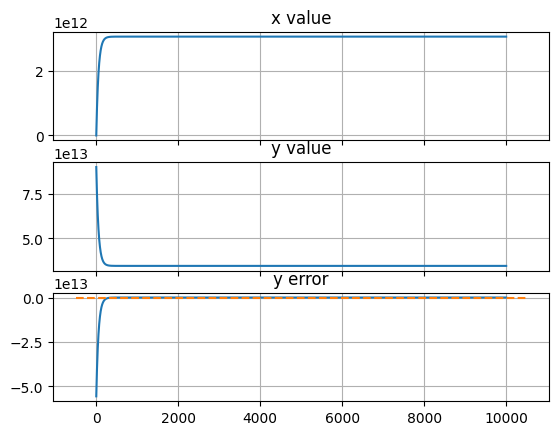

In [220]:
fig, (x_ax, y_ax, error_ax) = plt.subplots(nrows=3, sharex=True)
x_ax.plot(x)
x_ax.set_title('x value')
y_ax.plot(y)
y_ax.set_title('y value')
error_ax.plot([target - value for value in y])
error_ax.plot(error_ax.get_xlim(), [0] * 2, '--')
error_ax.set_title('y error')
for ax in fig.axes:
    ax.grid('ON')

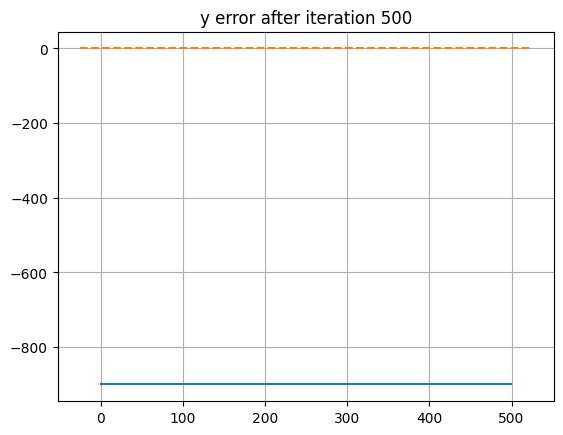

In [221]:
fig, error_ax = plt.subplots()
error_ax.plot([target - value for value in y][-500:])
error_ax.plot(error_ax.get_xlim(), [0] * 2, '--')
error_ax.set_title('y error after iteration 500')
error_ax.grid('ON')

In [222]:
# not quite there!
# perhaps it just needs a little nudge
x_stepped = [x[-1]]
y_stepped = [y[-1]]

while y_stepped[-1] > target:
    x_stepped.append(x_stepped[-1] + 1)
    tracers['humn'].output = str(x_stepped[-1])
    y_stepped.append(tracers[monkey_a].get_value(tracers))


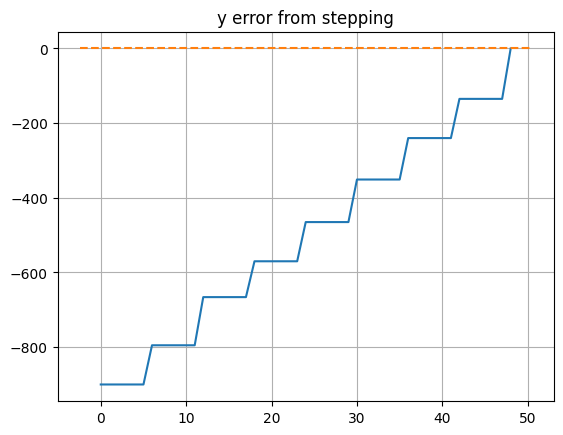

In [223]:
fig, error_ax = plt.subplots()
error_ax.plot([target - value for value in y_stepped])
error_ax.plot(error_ax.get_xlim(), [0] * 2, '--')
error_ax.set_title('y error from stepping')
error_ax.grid('ON')

In [225]:
# the final stepped x value should be the answer!
print(f'the number I need to yell is: {x_stepped[-1]}')

the number I need to yell is: 3059361893920
